# DATA SET DAYS

## Load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model 
import seaborn as sns
import warnings

from google.colab import files 
datos = files.upload()


Saving day.csv to day.csv


In [ ]:
import io 
datos_bici = pd.read_csv(io.BytesIO(datos['day.csv']))
datos_bici

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Informacion Estadistica 

In [ ]:
datos_bici.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Información sobre los campos

In [ ]:
datos_bici.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Visualizar de todos los campos los datos unicos

In [ ]:
datos_bici.apply(lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

## Visualizar Valores Vacios 

In [ ]:
datos_bici.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
datos_bici.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Renombrar los nombres de las columnas

In [ ]:
datos_bici= datos_bici.rename(columns={'weathersit':'weather', 'yr':'year','mnth':'month','hum':'humidity','cnt':'count'})

In [ ]:
datos_bici

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Informacion Irrelevante 

In [ ]:
datos_bici.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600




```
instant
year
dteday
```



In [ ]:
datos_bici = datos_bici.drop(columns=['instant','dteday', 'year'])
datos_bici.head()

,season,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Grafica de barras

[Text(0.5, 1.0, 'Count bikes during different weekdays')]

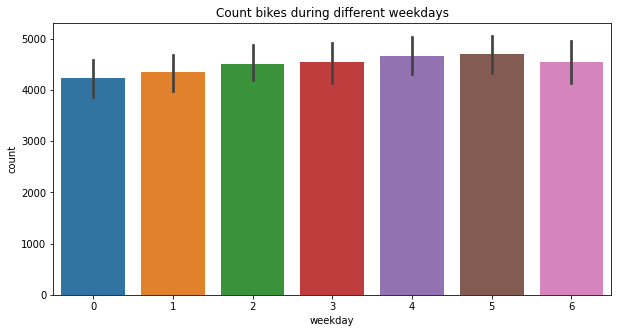

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=datos_bici, x='weekday', y='count', ax=ax)
ax.set(title='Count bikes during different weekdays')

## Grafica de lines punteadas

[Text(0.5, 1.0, 'Count of bikes by month')]

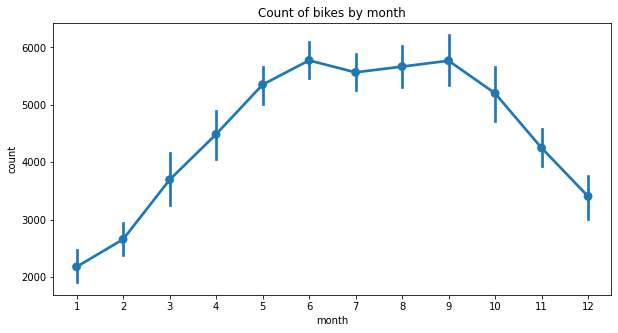

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=datos_bici, x='month', y='count', ax = ax)
ax.set(title='Count of bikes by month')

## Grafica de lineas  con Hue serie

[Text(0.5, 1.0, 'Count of bikes during weekdays')]

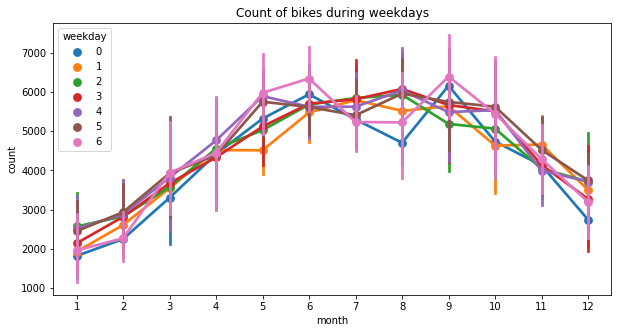

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=datos_bici, x='month',y='count', hue='weekday',ax = ax)
ax.set(title='Count of bikes during weekdays')

[Text(0.5, 1.0, 'Count of bikes during weekdays')]

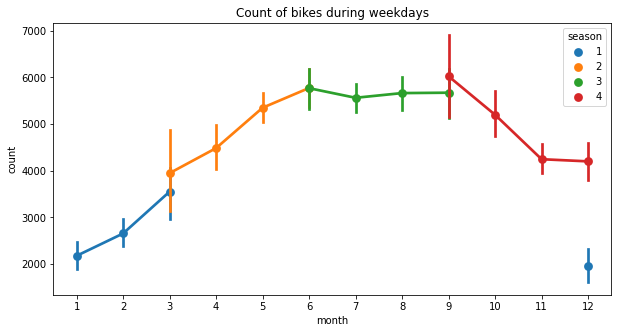

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=datos_bici, x='month',y='count', hue='season',ax = ax)
ax.set(title='Count of bikes during weekdays')

[Text(0.5, 1.0, 'Count of bikes during weekdays')]

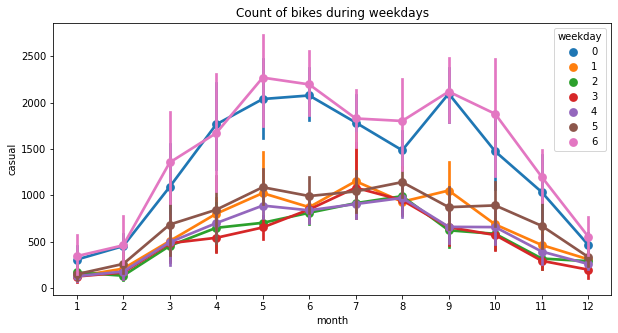

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=datos_bici, x='month',y='casual', hue='weekday',ax = ax)
ax.set(title='Count of bikes during weekdays')

[Text(0.5, 1.0, 'Count of bikes during weekdays')]

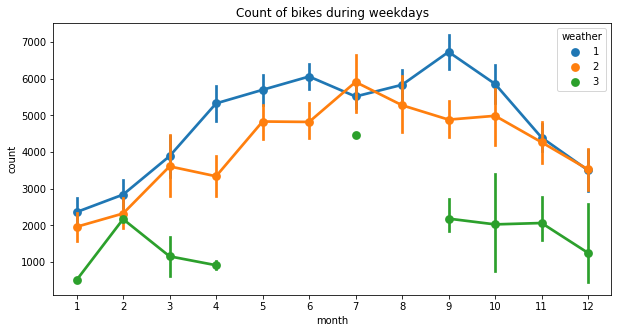

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(data=datos_bici, x='month',y='count', hue='weather',ax = ax)
ax.set(title='Count of bikes during weekdays')

## Grafica de correlación

[Text(0.5, 1.0, 'Relation between humidity and users')]

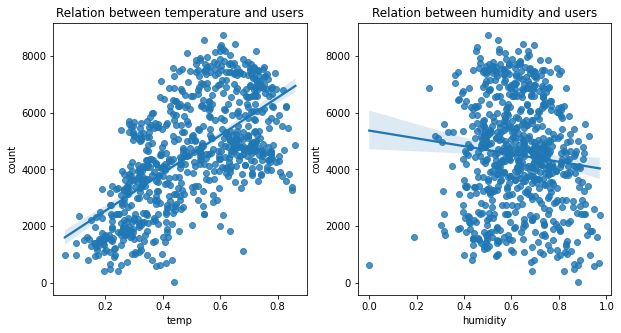

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))
sns.regplot(data = datos_bici, x='temp', y='count',ax = ax1)
ax1.set(title='Relation between temperature and users')

sns.regplot(data = datos_bici, x='humidity', y='count', ax= ax2)
ax2.set(title='Relation between humidity and users') 

## Grafica matriz de correlación

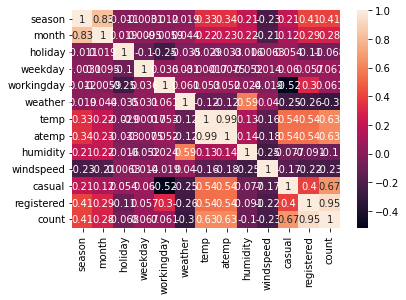

In [ ]:
correlacion = datos_bici.corr()
sns.heatmap(correlacion, annot=True)

In [ ]:
cols =['season','month','holiday', 'weekday', 'workingday', 'weather']
for col in cols:
  datos_bici[col]=datos_bici[col].astype('category')
datos_bici.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   month       731 non-null    category
 2   holiday     731 non-null    category
 3   weekday     731 non-null    category
 4   workingday  731 non-null    category
 5   weather     731 non-null    category
 6   temp        731 non-null    float64 
 7   atemp       731 non-null    float64 
 8   humidity    731 non-null    float64 
 9   windspeed   731 non-null    float64 
 10  casual      731 non-null    int64   
 11  registered  731 non-null    int64   
 12  count       731 non-null    int64   
dtypes: category(6), float64(4), int64(3)
memory usage: 45.6 KB


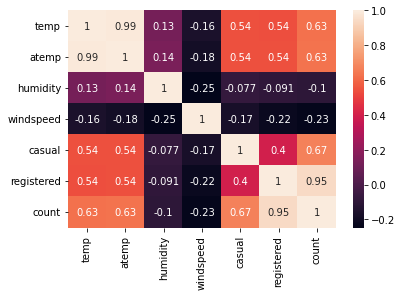

In [ ]:
correlacion = datos_bici.corr()
sns.heatmap(correlacion, annot=True)